#**Student Percentage Detection | The Sparks Foundation Task 4 | August21 | DataScience**

### Author: Nimra Khan
DOMAIN - Computer
Vision &
Internet of
Things

TASK PERFORMED - Character detector which extracts printed or handwritten text from an
image or video.



#**INSTALLING AND IMPORTING DEPENDENCIES** 

In [ ]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1 MB 1.6 kB/s 
     |████████████████████████████████| 8.8 MB 6.9 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.2.0+cu92 which is incompatible.


In [ ]:
pip install easyocr

     |████████████████████████████████| 63.6 MB 8.8 kB/s 
     |████████████████████████████████| 22.1 MB 65.3 MB/s 
     |████████████████████████████████| 831.4 MB 2.7 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.2.0+cu92
    Uninstalling torch-1.2.0+cu92:
      Successfully uninstalled torch-1.2.0+cu92
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.4.0+cu92
    Uninstalling torchvision-0.4.0+cu92:
      Successfully uninstalled torchvision-0.4.0+cu92


In [ ]:
import easyocr #to perform optical character recognisation 
import cv2
from matplotlib import pyplot as plt
import numpy as np 
from google.colab.patches import cv2_imshow

#**READ IN IMAGES OR VIDEO**

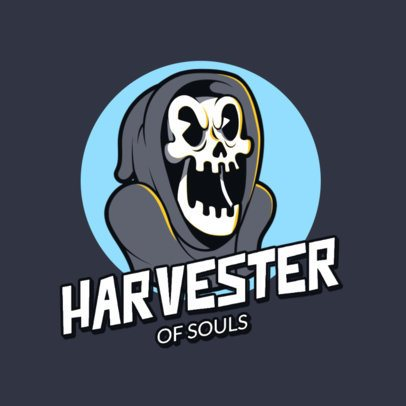

In [ ]:
#loading the respective image
image = cv2.imread("/content/optimized_large_thumb_stage.jpg")
cv2_imshow(image)

In [ ]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(image)
result

Using CPU. Note: This module is much faster with a GPU.


[([[152, 320], [186, 320], [186, 348], [152, 348]], 'OF', 0.9979275103973383),
 ([[45.12231391320246, 272.6590080871632],
   [345.4388343877412, 227.05657632139736],
   [352.87768608679755, 298.3409919128368],
   [52.561165612258776, 342.94342367860264]],
  'HARVESTER',
  0.9991834483368798),
 ([[178.98198161801108, 318.78017977981216],
   [251.65829463842647, 307.6095074199],
   [255.01801838198892, 334.21982022018784],
   [181.34170536157353, 344.3904925801]],
  'SOULS',
  0.9997542280457523)]

In [ ]:
result[0]

([[152, 320], [186, 320], [186, 348], [152, 348]], 'OF', 0.9979275103973383)

In [ ]:
result[1]

([[45.12231391320246, 272.6590080871632],
  [345.4388343877412, 227.05657632139736],
  [352.87768608679755, 298.3409919128368],
  [52.561165612258776, 342.94342367860264]],
 'HARVESTER',
 0.9991834483368798)

In [ ]:
result[2]

([[178.98198161801108, 318.78017977981216],
  [251.65829463842647, 307.6095074199],
  [255.01801838198892, 334.21982022018784],
  [181.34170536157353, 344.3904925801]],
 'SOULS',
 0.9997542280457523)

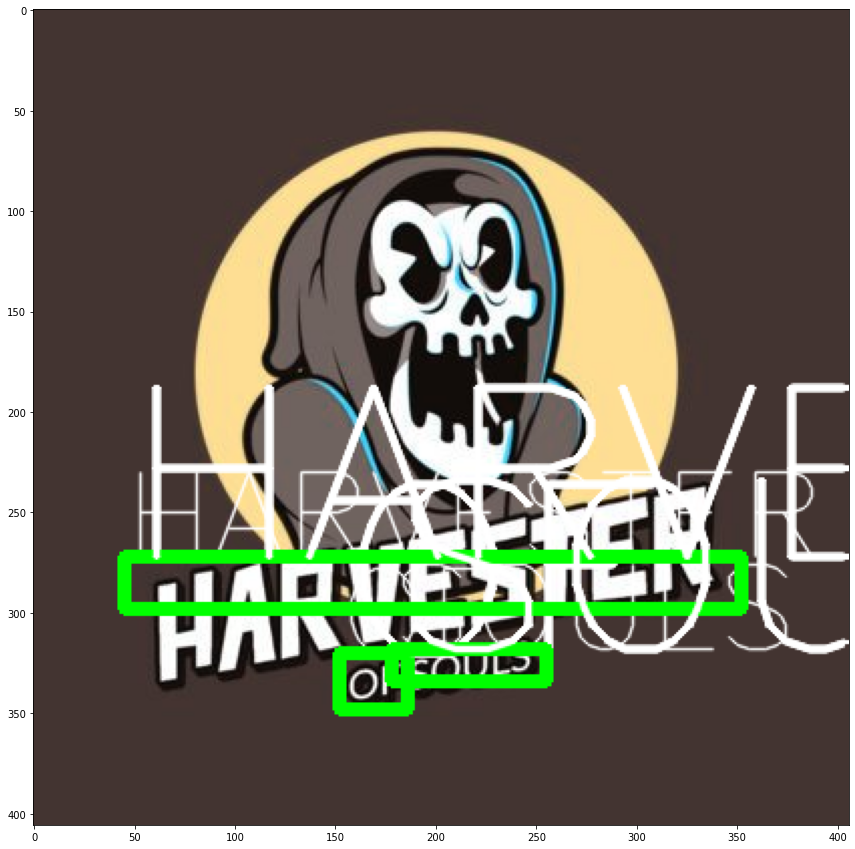

In [ ]:
for detection in result:
  top_left = tuple([int(val)for val in  detection[0][0]])
  bottom_right = tuple([int(val)for val in  detection[0][2]])
  text = detection[1]
  font = cv2.FONT_HERSHEY_SIMPLEX
  image = cv2.rectangle(image, top_left, bottom_right, (0,255,0),5)
  image = cv2.putText(image, text, top_left, font, 4, (255,255,255), 2, cv2.LINE_AA)

plt.figure(figsize=(15,15))
plt.imshow(image)
plt.show()

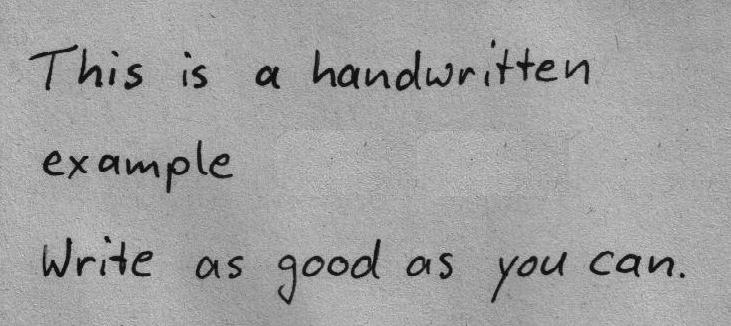

In [ ]:
#Lets try OCR for hand written texts 
image2 = cv2.imread("/content/Sample-handwritten-text-input-for-OCR.png")
cv2_imshow(image2)

In [ ]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(image2)
result

Using CPU. Note: This module is much faster with a GPU.


[([[23, 39], [153, 39], [153, 99], [23, 99]], 'This', 0.9986737966537476),
 ([[175, 49], [213, 49], [213, 93], [175, 93]], 'is', 0.7806120834165496),
 ([[252, 60], [286, 60], [286, 92], [252, 92]], '1', 0.03987628027779522),
 ([[304, 35], [598, 35], [598, 102], [304, 102]],
  'handwr #ten',
  0.7203300618057498),
 ([[36, 143], [98, 143], [98, 186], [36, 186]], 'ex', 0.9996003026887624),
 ([[34, 232], [160, 232], [160, 284], [34, 284]], 'Wrie', 0.9296042323112488),
 ([[192, 252], [248, 252], [248, 284], [192, 284]], 'M$', 0.19908094513785626),
 ([[403, 247], [461, 247], [461, 285], [403, 285]], '0$', 0.8856709599682184),
 ([[584, 243], [692, 243], [692, 286], [584, 286]],
  'can.',
  0.8341314196586609),
 ([[89.21854690504249, 143.23047823916147],
   [239.2609903369994, 131.8695048315003],
   [240.7814530949575, 194.76952176083853],
   [90.73900966300059, 206.1304951684997]],
  'awple',
  0.6328249280713061),
 ([[265.12649295349735, 246.25537463259042],
   [387.8578226747205, 232.167779

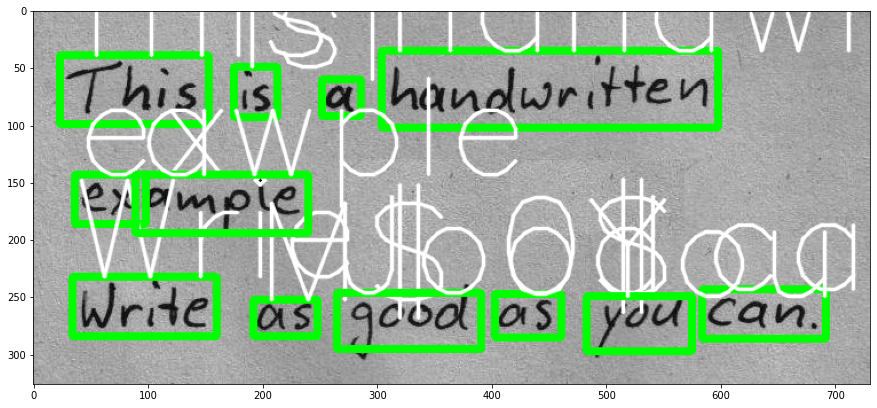

In [ ]:
for detection in result:
  top_left = tuple([int(val)for val in  detection[0][0]])
  bottom_right = tuple([int(val)for val in  detection[0][2]])
  text = detection[1]
  font = cv2.FONT_HERSHEY_SIMPLEX
  image2 = cv2.rectangle(image2, top_left, bottom_right, (0,255,0),5)
  image2 = cv2.putText(image2, text, top_left, font, 4, (255,255,255), 2, cv2.LINE_AA)

plt.figure(figsize=(15,15))
plt.imshow(image2)
plt.show()